In [1]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [2]:
import sys
sys.path.insert(0, '/content/gdrive/MyDrive/Colab Notebooks')

In [3]:
import pytorch_optimizer as optim

In [ ]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         108G   24G   85G  22% /
tmpfs            64M     0   64M   0% /dev
shm             5.8G     0  5.8G   0% /dev/shm
/dev/root       2.0G  1.1G  841M  58% /usr/sbin/docker-init
tmpfs           6.4G   80K  6.4G   1% /var/colab
/dev/sda1        70G   42G   28G  61% /etc/hosts
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware
drive            15G     0   15G   0% /content/gdrive


In [ ]:
!ls /content/gdrive/'MyDrive'/datasets/

 emoji		      __MACOSX
 emoji2		      model-3classes-emoji2-resnet152-1epoch-accT065.pth
 ham10000	      model-3classes-emoji2-resnet152-3epoch-accT056.pth
 ham_100_X_test.pt    model-3classes-emoji2-resnet18-10epoch-acc060.pth
 ham_100_X_train.pt   model-3classes-emoji2-resnet18-20epoch-accT065.pth
 ham_100_y_test.pt    model-3classes-emoji2-resnet18-40epoch-accT065.pth
 ham_100_y_train.pt   model-3classes-emoji2-resnet34-10epoch-acc060.pth
 ham_224_X_test.pt    model-resnet50-clean-dirty.pth
 ham_224_X_train.pt   plates
 ham_224_y_test.pt    plates.zip
 ham_224_y_train.pt   UCMercedL
'IMDB Dataset.csv'


In [4]:
import os

In [ ]:
print(os.listdir("../content/gdrive/MyDrive/datasets/UCMercedL/Images"))

['tenniscourt', 'storagetanks', 'sparseresidential', 'runway', 'river', 'parkinglot', 'overpass', 'mobilehomepark', 'mediumresidential', 'intersection', 'harbor', 'golfcourse', 'freeway', 'forest', 'denseresidential', 'chaparral', 'buildings', 'beach', 'baseballdiamond', 'airplane', 'agricultural']


In [5]:
import numpy as np
import pandas as pd

In [6]:
data_root = '../content/gdrive/MyDrive/datasets/UCMercedL/'
print(os.listdir(data_root))

['Images', 'train', 'test']


In [7]:
import shutil 
from tqdm import tqdm

train_dir = '../content/gdrive/MyDrive/datasets/UCMercedL/train'
val_dir = '../content/gdrive/MyDrive/datasets/UCMercedL/test'

In [ ]:
'''
import shutil 
from tqdm import tqdm

train_dir = 'train'
val_dir = 'test'

class_names = ['tenniscourt', 'storagetanks', 'sparseresidential', 'runway', 'river', 'parkinglot', 'overpass', 'mobilehomepark', 'mediumresidential', 'intersection', 'harbor', 'golfcourse', 'freeway', 'forest', 'denseresidential', 'chaparral', 'buildings', 'beach', 'baseballdiamond', 'airplane', 'agricultural']

for dir_name in [train_dir, val_dir]:
    for class_name in class_names:
        os.makedirs(os.path.join(dir_name, class_name), exist_ok=True)

for class_name in class_names:
    source_dir = os.path.join(data_root, 'train', class_name)
    for i, file_name in enumerate(tqdm(os.listdir(source_dir))):
        if i % 5 != 0:
            dest_dir = os.path.join(train_dir, class_name) 
        else:
            dest_dir = os.path.join(val_dir, class_name)
        shutil.copy(os.path.join(source_dir, file_name), os.path.join(dest_dir, file_name))

'''

100%|██████████| 85/85 [00:00<00:00, 448.96it/s]


In [ ]:
!ls

gdrive	sample_data  test  train


In [ ]:
!mv test ../content/gdrive/MyDrive/datasets/UCMercedL/

In [ ]:
!mv train ../content/gdrive/MyDrive/datasets/UCMercedL/

In [8]:
import torch
import numpy as np
import torchvision
import matplotlib.pyplot as plt
import time
import copy

In [9]:
from torchvision import transforms, models
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

val_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

train_dataset = torchvision.datasets.ImageFolder(train_dir, train_transforms)
val_dataset = torchvision.datasets.ImageFolder(val_dir, val_transforms)

batch_size = 18
train_dataloader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True, num_workers=batch_size)
val_dataloader = torch.utils.data.DataLoader(
    val_dataset, batch_size=batch_size, shuffle=False, num_workers=batch_size)

/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 18 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
len(train_dataloader), len(train_dataset)

(80, 1428)

In [ ]:
len(val_dataloader), len(val_dataset)

(20, 357)

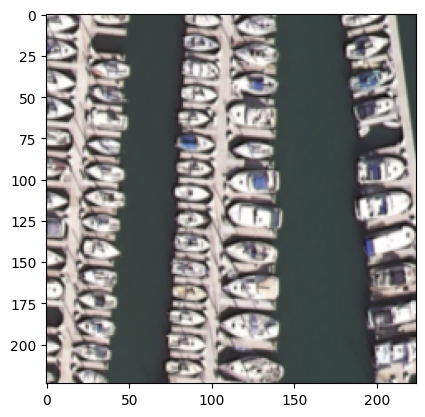

In [10]:
X_batch, y_batch = next(iter(train_dataloader))
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
plt.imshow(X_batch[0].permute(1, 2, 0).numpy() * std + mean);

In [11]:
data_root = '../content/gdrive/MyDrive/datasets/UCMercedL/'
print(os.listdir(data_root))

['Images', 'train', 'test']


In [12]:
class_names = train_dataset.classes

In [13]:
def show_input(input_tensor, title=''):
    image = input_tensor.permute(1, 2, 0).numpy()
    image = std * image + mean
    plt.imshow(image.clip(0, 1))
    plt.title(title)
    plt.show()
    plt.pause(0.001)

X_batch, y_batch = next(iter(train_dataloader))

for x_item, y_item in zip(X_batch, y_batch):
    show_input(x_item, title=class_names[y_item])

Output hidden; open in https://colab.research.google.com to view.

In [14]:
def train_model(model, loss, optimizer, scheduler, num_epochs):
    for epoch in range(num_epochs):
        print('Epoch {}/{}:'.format(epoch, num_epochs - 1), flush=True)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                dataloader = train_dataloader
                scheduler.step()
                model.train()  # Set model to training mode
            else:
                dataloader = val_dataloader
                model.eval()   # Set model to evaluate mode

            running_loss = 0.
            running_acc = 0.

            # Iterate over data.
            for inputs, labels in tqdm(dataloader):
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                # forward and backward
                with torch.set_grad_enabled(phase == 'train'):
                    preds = model(inputs)
                    loss_value = loss(preds, labels)
                    preds_class = preds.argmax(dim=1)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss_value.backward()
                        optimizer.step()

                # statistics
                running_loss += loss_value.item()
                running_acc += (preds_class == labels.data).float().mean()

            epoch_loss = running_loss / len(dataloader)
            epoch_acc = running_acc / len(dataloader)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc), flush=True)

    return model

In [15]:
from torchvision.models import resnet50, ResNet50_Weights

In [ ]:
model = resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)

model.fc = torch.nn.Linear(model.fc.in_features, 21)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1.0e-3)

# Decay LR by a factor of 0.1 every 7 epochs
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [ ]:
train_model(model, loss, optimizer, scheduler, num_epochs=10); #Adam

Epoch 0/9:


/usr/local/lib/python3.9/dist-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "
100%|██████████| 80/80 [00:17<00:00,  4.49it/s]

train Loss: 1.5695 Acc: 0.5396



100%|██████████| 20/20 [00:04<00:00,  4.97it/s]

val Loss: 1.5673 Acc: 0.6006
Epoch 1/9:



100%|██████████| 80/80 [00:19<00:00,  4.06it/s]

train Loss: 0.9938 Acc: 0.7049



100%|██████████| 20/20 [00:04<00:00,  4.15it/s]

val Loss: 0.6995 Acc: 0.7644
Epoch 2/9:



100%|██████████| 80/80 [00:18<00:00,  4.44it/s]

train Loss: 0.7858 Acc: 0.7590



100%|██████████| 20/20 [00:04<00:00,  4.42it/s]

val Loss: 0.9790 Acc: 0.6928
Epoch 3/9:



100%|██████████| 80/80 [00:19<00:00,  4.09it/s]

train Loss: 0.6980 Acc: 0.7785



100%|██████████| 20/20 [00:04<00:00,  4.79it/s]

val Loss: 0.4452 Acc: 0.8744
Epoch 4/9:



100%|██████████| 80/80 [00:18<00:00,  4.39it/s]

train Loss: 0.6048 Acc: 0.8243



100%|██████████| 20/20 [00:04<00:00,  4.01it/s]

val Loss: 0.7559 Acc: 0.8389
Epoch 5/9:



100%|██████████| 80/80 [00:18<00:00,  4.43it/s]

train Loss: 0.5656 Acc: 0.8201



100%|██████████| 20/20 [00:04<00:00,  4.96it/s]

val Loss: 0.5182 Acc: 0.8411
Epoch 6/9:



100%|██████████| 80/80 [00:19<00:00,  4.15it/s]

train Loss: 0.4045 Acc: 0.8736



100%|██████████| 20/20 [00:05<00:00,  3.75it/s]

val Loss: 0.1857 Acc: 0.9272
Epoch 7/9:



100%|██████████| 80/80 [00:18<00:00,  4.44it/s]

train Loss: 0.3100 Acc: 0.9035



100%|██████████| 20/20 [00:04<00:00,  4.83it/s]

val Loss: 0.1321 Acc: 0.9633
Epoch 8/9:



100%|██████████| 80/80 [00:20<00:00,  4.00it/s]

train Loss: 0.2735 Acc: 0.9118



100%|██████████| 20/20 [00:04<00:00,  4.49it/s]

val Loss: 0.1289 Acc: 0.9606
Epoch 9/9:



100%|██████████| 80/80 [00:18<00:00,  4.42it/s]

train Loss: 0.2456 Acc: 0.9187



100%|██████████| 20/20 [00:04<00:00,  4.37it/s]

val Loss: 0.1235 Acc: 0.9522


In [ ]:
train_model(model, loss, optimizer, scheduler, num_epochs=10); #Adam

Epoch 0/9:


/usr/local/lib/python3.9/dist-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "
  0%|          | 0/100 [00:00<?, ?it/s]/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 18 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowne

train Loss: 1.9998 Acc: 0.5583



100%|██████████| 18/18 [00:03<00:00,  5.24it/s]

val Loss: 1.3034 Acc: 0.8364
Epoch 1/9:



100%|██████████| 100/100 [00:12<00:00,  8.26it/s]

train Loss: 1.0504 Acc: 0.7989



100%|██████████| 18/18 [00:03<00:00,  5.21it/s]

val Loss: 0.7951 Acc: 0.8580
Epoch 2/9:



100%|██████████| 100/100 [00:12<00:00,  8.24it/s]

train Loss: 0.7772 Acc: 0.8411



100%|██████████| 18/18 [00:03<00:00,  5.26it/s]

val Loss: 0.5747 Acc: 0.8827
Epoch 3/9:



100%|██████████| 100/100 [00:12<00:00,  8.17it/s]

train Loss: 0.6405 Acc: 0.8561



100%|██████████| 18/18 [00:03<00:00,  5.49it/s]

val Loss: 0.4983 Acc: 0.9012
Epoch 4/9:



100%|██████████| 100/100 [00:12<00:00,  7.99it/s]

train Loss: 0.5634 Acc: 0.8733



100%|██████████| 18/18 [00:03<00:00,  5.34it/s]

val Loss: 0.4531 Acc: 0.9105
Epoch 5/9:



100%|██████████| 100/100 [00:12<00:00,  8.09it/s]

train Loss: 0.5224 Acc: 0.8728



100%|██████████| 18/18 [00:03<00:00,  5.29it/s]

val Loss: 0.3834 Acc: 0.9136
Epoch 6/9:



100%|██████████| 100/100 [00:12<00:00,  8.25it/s]

train Loss: 0.4867 Acc: 0.8828



100%|██████████| 18/18 [00:03<00:00,  4.85it/s]

val Loss: 0.3962 Acc: 0.9352
Epoch 7/9:



100%|██████████| 100/100 [00:11<00:00,  8.81it/s]

train Loss: 0.4468 Acc: 0.8906



100%|██████████| 18/18 [00:04<00:00,  4.45it/s]

val Loss: 0.3654 Acc: 0.9198
Epoch 8/9:



100%|██████████| 100/100 [00:10<00:00,  9.34it/s]

train Loss: 0.4901 Acc: 0.8867



100%|██████████| 18/18 [00:04<00:00,  3.83it/s]

val Loss: 0.4127 Acc: 0.9105
Epoch 9/9:



100%|██████████| 100/100 [00:12<00:00,  7.75it/s]

train Loss: 0.4816 Acc: 0.8828



100%|██████████| 18/18 [00:04<00:00,  4.25it/s]

val Loss: 0.3915 Acc: 0.9228


In [ ]:
#optimizer = torch.optim.SGD(net.parameters(), lr=5.0e-2)
#optimizer = torch.optim.Adam(net.parameters(), lr=1.0e-3)
#optimizer = optim.PNMBelief(net.parameters(), lr=0.001)
#optimizer = optim.YogiPNM(net.parameters())
#optimizer = optim.AdaBelief(net.parameters())
#optimizer = optim.DiffGrad(net.parameters())
#optimizer = optim.Yogi(net.parameters())

In [16]:
model = resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)

model.fc = torch.nn.Linear(model.fc.in_features, 21)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

loss = torch.nn.CrossEntropyLoss()
optimizer = optim.DiffPNM(model.parameters(), lr=1.0e-3)

scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 55.8MB/s]


In [ ]:
train_model(model, loss, optimizer, scheduler, num_epochs=10); #DiffPNM

Epoch 0/9:


/usr/local/lib/python3.9/dist-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "
100%|██████████| 80/80 [00:32<00:00,  2.47it/s]

train Loss: 1.3565 Acc: 0.6104



100%|██████████| 20/20 [00:14<00:00,  1.42it/s]

val Loss: 0.5721 Acc: 0.8389
Epoch 1/9:



100%|██████████| 80/80 [00:21<00:00,  3.69it/s]

train Loss: 0.6614 Acc: 0.7889



100%|██████████| 20/20 [00:03<00:00,  5.82it/s]

val Loss: 0.3328 Acc: 0.8972
Epoch 2/9:



100%|██████████| 80/80 [00:20<00:00,  3.82it/s]

train Loss: 0.5537 Acc: 0.8479



100%|██████████| 20/20 [00:04<00:00,  4.60it/s]

val Loss: 0.4653 Acc: 0.9078
Epoch 3/9:



100%|██████████| 80/80 [00:20<00:00,  3.86it/s]

train Loss: 0.4300 Acc: 0.8674



100%|██████████| 20/20 [00:03<00:00,  5.44it/s]

val Loss: 0.2353 Acc: 0.9250
Epoch 4/9:



100%|██████████| 80/80 [00:21<00:00,  3.79it/s]

train Loss: 0.3529 Acc: 0.8903



100%|██████████| 20/20 [00:03<00:00,  6.07it/s]

val Loss: 0.2078 Acc: 0.9272
Epoch 5/9:



 65%|██████▌   | 52/80 [00:14<00:06,  4.60it/s]

In [ ]:
train_model(model, loss, optimizer, scheduler, num_epochs=10); #Yogi

Epoch 0/9:


/usr/local/lib/python3.9/dist-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "
  0%|          | 0/80 [00:00<?, ?it/s]/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 18 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slownes

train Loss: 2.3136 Acc: 0.4410



100%|██████████| 20/20 [00:05<00:00,  3.74it/s]

val Loss: 0.5474 Acc: 0.8428
Epoch 1/9:



100%|██████████| 80/80 [00:18<00:00,  4.37it/s]

train Loss: 0.6733 Acc: 0.8000



100%|██████████| 20/20 [00:04<00:00,  4.88it/s]

val Loss: 0.2354 Acc: 0.9333
Epoch 2/9:



100%|██████████| 80/80 [00:19<00:00,  4.03it/s]

train Loss: 0.5075 Acc: 0.8521



100%|██████████| 20/20 [00:05<00:00,  3.97it/s]

val Loss: 0.2972 Acc: 0.9072
Epoch 3/9:



100%|██████████| 80/80 [00:18<00:00,  4.43it/s]

train Loss: 0.4343 Acc: 0.8743



100%|██████████| 20/20 [00:04<00:00,  4.83it/s]

val Loss: 0.3098 Acc: 0.9000
Epoch 4/9:



100%|██████████| 80/80 [00:20<00:00,  3.98it/s]

train Loss: 0.4392 Acc: 0.8799



100%|██████████| 20/20 [00:04<00:00,  4.88it/s]

val Loss: 0.3064 Acc: 0.9361
Epoch 5/9:



100%|██████████| 80/80 [00:18<00:00,  4.37it/s]

train Loss: 0.4334 Acc: 0.8861



100%|██████████| 20/20 [00:04<00:00,  4.47it/s]

val Loss: 0.1626 Acc: 0.9556
Epoch 6/9:



100%|██████████| 80/80 [00:18<00:00,  4.26it/s]

train Loss: 0.2627 Acc: 0.9146



100%|██████████| 20/20 [00:04<00:00,  4.78it/s]

val Loss: 0.0751 Acc: 0.9750
Epoch 7/9:



100%|██████████| 80/80 [00:19<00:00,  4.17it/s]

train Loss: 0.1943 Acc: 0.9444



100%|██████████| 20/20 [00:05<00:00,  3.52it/s]

val Loss: 0.0473 Acc: 0.9806
Epoch 8/9:



100%|██████████| 80/80 [00:18<00:00,  4.42it/s]

train Loss: 0.1795 Acc: 0.9458



100%|██████████| 20/20 [00:04<00:00,  4.92it/s]

val Loss: 0.0391 Acc: 0.9889
Epoch 9/9:



100%|██████████| 80/80 [00:20<00:00,  3.92it/s]

train Loss: 0.1647 Acc: 0.9458



100%|██████████| 20/20 [00:04<00:00,  4.58it/s]

val Loss: 0.0446 Acc: 0.9806


In [ ]:
train_model(model, loss, optimizer, scheduler, num_epochs=10); #DiffGrad

Epoch 0/9:


/usr/local/lib/python3.9/dist-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "
  0%|          | 0/80 [00:00<?, ?it/s]/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 18 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slownes

train Loss: 1.3848 Acc: 0.6139



100%|██████████| 20/20 [00:04<00:00,  4.77it/s]

val Loss: 0.4416 Acc: 0.8806
Epoch 1/9:



100%|██████████| 80/80 [00:21<00:00,  3.69it/s]

train Loss: 0.6437 Acc: 0.7993



100%|██████████| 20/20 [00:04<00:00,  4.67it/s]

val Loss: 0.1962 Acc: 0.9472
Epoch 2/9:



100%|██████████| 80/80 [00:19<00:00,  4.05it/s]

train Loss: 0.4719 Acc: 0.8521



100%|██████████| 20/20 [00:05<00:00,  3.53it/s]

val Loss: 0.3268 Acc: 0.9111
Epoch 3/9:



100%|██████████| 80/80 [00:19<00:00,  4.03it/s]

train Loss: 0.4893 Acc: 0.8556



100%|██████████| 20/20 [00:04<00:00,  4.66it/s]

val Loss: 0.3406 Acc: 0.9078
Epoch 4/9:



100%|██████████| 80/80 [00:21<00:00,  3.69it/s]

train Loss: 0.3575 Acc: 0.8896



100%|██████████| 20/20 [00:04<00:00,  4.62it/s]

val Loss: 0.1255 Acc: 0.9694
Epoch 5/9:



100%|██████████| 80/80 [00:19<00:00,  4.10it/s]

train Loss: 0.3019 Acc: 0.9062



100%|██████████| 20/20 [00:05<00:00,  3.37it/s]

val Loss: 0.2516 Acc: 0.9167
Epoch 6/9:



100%|██████████| 80/80 [00:19<00:00,  4.03it/s]

train Loss: 0.2314 Acc: 0.9299



100%|██████████| 20/20 [00:04<00:00,  4.94it/s]

val Loss: 0.0521 Acc: 0.9806
Epoch 7/9:



100%|██████████| 80/80 [00:21<00:00,  3.71it/s]

train Loss: 0.1843 Acc: 0.9493



100%|██████████| 20/20 [00:04<00:00,  4.66it/s]

val Loss: 0.0415 Acc: 0.9833
Epoch 8/9:



100%|██████████| 80/80 [00:19<00:00,  4.01it/s]

train Loss: 0.1526 Acc: 0.9556



100%|██████████| 20/20 [00:05<00:00,  3.59it/s]

val Loss: 0.0419 Acc: 0.9861
Epoch 9/9:



100%|██████████| 80/80 [00:20<00:00,  3.82it/s]

train Loss: 0.1758 Acc: 0.9410



100%|██████████| 20/20 [00:04<00:00,  4.81it/s]

val Loss: 0.0409 Acc: 0.9861


In [ ]:
train_model(model, loss, optimizer, scheduler, num_epochs=10); #PNMBelief

Epoch 0/9:


/usr/local/lib/python3.9/dist-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "
  0%|          | 0/80 [00:00<?, ?it/s]/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 18 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slownes

train Loss: 1.4013 Acc: 0.6007



100%|██████████| 20/20 [00:05<00:00,  3.97it/s]

val Loss: 0.7051 Acc: 0.8044
Epoch 1/9:



100%|██████████| 80/80 [00:19<00:00,  4.19it/s]

train Loss: 0.6932 Acc: 0.7861



100%|██████████| 20/20 [00:04<00:00,  4.45it/s]

val Loss: 0.3937 Acc: 0.8739
Epoch 2/9:



100%|██████████| 80/80 [00:19<00:00,  4.03it/s]

train Loss: 0.5481 Acc: 0.8333



100%|██████████| 20/20 [00:04<00:00,  4.80it/s]

val Loss: 0.3492 Acc: 0.9022
Epoch 3/9:



100%|██████████| 80/80 [00:20<00:00,  3.83it/s]

train Loss: 0.3942 Acc: 0.8757



100%|██████████| 20/20 [00:04<00:00,  4.21it/s]

val Loss: 0.2554 Acc: 0.9250
Epoch 4/9:



100%|██████████| 80/80 [00:19<00:00,  4.12it/s]

train Loss: 0.4034 Acc: 0.8785



100%|██████████| 20/20 [00:04<00:00,  4.13it/s]

val Loss: 0.2116 Acc: 0.9417
Epoch 5/9:



100%|██████████| 80/80 [00:19<00:00,  4.07it/s]

train Loss: 0.3989 Acc: 0.8792



100%|██████████| 20/20 [00:04<00:00,  4.68it/s]

val Loss: 0.1448 Acc: 0.9494
Epoch 6/9:



100%|██████████| 80/80 [00:21<00:00,  3.79it/s]

train Loss: 0.2320 Acc: 0.9361



100%|██████████| 20/20 [00:04<00:00,  4.33it/s]

val Loss: 0.0917 Acc: 0.9639
Epoch 7/9:



100%|██████████| 80/80 [00:19<00:00,  4.15it/s]

train Loss: 0.1973 Acc: 0.9403



100%|██████████| 20/20 [00:04<00:00,  4.10it/s]

val Loss: 0.0750 Acc: 0.9778
Epoch 8/9:



100%|██████████| 80/80 [00:19<00:00,  4.04it/s]

train Loss: 0.1909 Acc: 0.9451



100%|██████████| 20/20 [00:04<00:00,  4.62it/s]

val Loss: 0.0721 Acc: 0.9778
Epoch 9/9:



100%|██████████| 80/80 [00:21<00:00,  3.77it/s]

train Loss: 0.1523 Acc: 0.9542



100%|██████████| 20/20 [00:04<00:00,  4.61it/s]

val Loss: 0.0640 Acc: 0.9833


In [ ]:
preds = pd.Series() #заменить на дотафрейм и добавлять новые строки снизу
y_test = pd.Series()
for inputs, labels in tqdm(val_dataloader):
    inputs = inputs.to(device)
    optimizer.zero_grad()
    y_test = pd.concat([y_test, pd.Series(labels)])
    with torch.set_grad_enabled(False):
        pred = model(inputs)
        #m = torch.nn.Softmax(dim=1)
        #preds = pd.Series(pred.argmax(dim=1))
        preds = pd.concat([preds, pd.Series(pred.to('cpu').argmax(dim=1))])

<ipython-input-72-d780da8d061b>:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  preds = pd.Series() #заменить на дотафрейм и добавлять новые строки снизу
<ipython-input-72-d780da8d061b>:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  y_test = pd.Series()
  0%|          | 0/20 [00:00<?, ?it/s]/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 18 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_m

In [ ]:
(torch.tensor(preds.tolist()) == torch.tensor(y_test.tolist())).float().mean().item()

0.9747899174690247

In [ ]:
APreds = pd.DataFrame()

In [ ]:
APreds['Adam'] = preds

In [ ]:
APreds['Yogi'] = preds

In [ ]:
APreds['DiffGrad'] = preds

In [ ]:
APreds['PNMBelief'] = preds

In [ ]:
APreds['DiffPNM'] = preds.tolist()

In [ ]:
APreds

,Adam,Yogi,DiffGrad,PNMBelief,DiffPNM
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
352,20,20,20,20,20
353,20,20,20,20,20
354,12,20,20,20,20
355,20,20,20,20,20


In [ ]:
APreds = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/uc_lands_resnet.csv')
APreds = APreds.drop(['Unnamed: 0'], axis=1)

In [ ]:
APreds.to_csv('/content/gdrive/MyDrive/Colab Notebooks/uc_lands_resnet.csv')

In [ ]:
APreds

,Adam,Yogi,DiffGrad,PNMBelief
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
352,20,20,20,20
353,20,20,20,20
354,12,20,20,20
355,20,20,20,20


In [ ]:
data = np.zeros((357,21), dtype=int)
ARes = pd.DataFrame(data)

In [ ]:
for i in range(357):
    for j in range(5):
        if j == 0:
            ARes.iloc[i, APreds.iloc[i, j]] += 0.95238
        if j == 1:
            ARes.iloc[i, APreds.iloc[i, j]] += 0.98039
        if j == 2:
            ARes.iloc[i, APreds.iloc[i, j]] += 0.9859
        if j == 3:
            ARes.iloc[i, APreds.iloc[i, j]] += 0.98319
        if j == 4:
            ARes.iloc[i, APreds.iloc[i, j]] += 0.97759

In [ ]:
anslist = ARes.idxmax(axis=1)
(torch.tensor(anslist) == torch.tensor(y_test.tolist())).float().mean().item()

0.994397759437561

# DenseNet

In [ ]:
from torchvision.models import densenet121, DenseNet121_Weights

In [ ]:
model = densenet121(weights=DenseNet121_Weights.IMAGENET1K_V1)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1.0e-3)

scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [ ]:
train_model(model, loss, optimizer, scheduler, num_epochs=10); #Adam

Epoch 0/9:


/usr/local/lib/python3.9/dist-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "
  0%|          | 0/80 [00:00<?, ?it/s]/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 18 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slownes

train Loss: 2.0193 Acc: 0.5097



100%|██████████| 20/20 [00:05<00:00,  3.53it/s]

val Loss: 1.2049 Acc: 0.6544
Epoch 1/9:



100%|██████████| 80/80 [00:19<00:00,  4.05it/s]

train Loss: 1.0349 Acc: 0.6778



100%|██████████| 20/20 [00:05<00:00,  3.93it/s]

val Loss: 0.7784 Acc: 0.7533
Epoch 2/9:



100%|██████████| 80/80 [00:19<00:00,  4.05it/s]

train Loss: 0.8854 Acc: 0.7257



100%|██████████| 20/20 [00:04<00:00,  4.51it/s]

val Loss: 0.6483 Acc: 0.8111
Epoch 3/9:



100%|██████████| 80/80 [00:21<00:00,  3.69it/s]

train Loss: 0.7301 Acc: 0.7826



100%|██████████| 20/20 [00:04<00:00,  4.39it/s]

val Loss: 0.3586 Acc: 0.8939
Epoch 4/9:



100%|██████████| 80/80 [00:20<00:00,  3.97it/s]

train Loss: 0.6398 Acc: 0.7986



100%|██████████| 20/20 [00:06<00:00,  3.31it/s]

val Loss: 0.8434 Acc: 0.7667
Epoch 5/9:



100%|██████████| 80/80 [00:19<00:00,  4.08it/s]

train Loss: 0.6354 Acc: 0.8083



100%|██████████| 20/20 [00:04<00:00,  4.17it/s]

val Loss: 0.3429 Acc: 0.8778
Epoch 6/9:



100%|██████████| 80/80 [00:20<00:00,  3.89it/s]

train Loss: 0.3658 Acc: 0.8889



100%|██████████| 20/20 [00:04<00:00,  4.41it/s]

val Loss: 0.1645 Acc: 0.9472
Epoch 7/9:



100%|██████████| 80/80 [00:21<00:00,  3.76it/s]

train Loss: 0.2972 Acc: 0.9062



100%|██████████| 20/20 [00:04<00:00,  4.18it/s]

val Loss: 0.1248 Acc: 0.9633
Epoch 8/9:



100%|██████████| 80/80 [00:20<00:00,  3.95it/s]

train Loss: 0.2286 Acc: 0.9403



100%|██████████| 20/20 [00:05<00:00,  3.38it/s]

val Loss: 0.1168 Acc: 0.9633
Epoch 9/9:



100%|██████████| 80/80 [00:19<00:00,  4.05it/s]

train Loss: 0.2029 Acc: 0.9361



100%|██████████| 20/20 [00:07<00:00,  2.54it/s]

val Loss: 0.1040 Acc: 0.9550


In [ ]:
model = densenet121(weights=DenseNet121_Weights.IMAGENET1K_V1)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

loss = torch.nn.CrossEntropyLoss()
optimizer = optim.PNMBelief(model.parameters(), lr=1.0e-3)

scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [ ]:
train_model(model, loss, optimizer, scheduler, num_epochs=10); #Yogi

Epoch 0/9:


/usr/local/lib/python3.9/dist-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "
  0%|          | 0/80 [00:00<?, ?it/s]/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 18 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slownes

train Loss: 4.1052 Acc: 0.3979



100%|██████████| 20/20 [00:04<00:00,  4.14it/s]

val Loss: 0.5428 Acc: 0.8328
Epoch 1/9:



100%|██████████| 80/80 [00:22<00:00,  3.51it/s]

train Loss: 0.6181 Acc: 0.8340



100%|██████████| 20/20 [00:04<00:00,  4.45it/s]

val Loss: 0.3014 Acc: 0.9106
Epoch 2/9:



100%|██████████| 80/80 [00:22<00:00,  3.48it/s]

train Loss: 0.4874 Acc: 0.8708



100%|██████████| 20/20 [00:04<00:00,  4.36it/s]

val Loss: 0.4126 Acc: 0.8911
Epoch 3/9:



100%|██████████| 80/80 [00:24<00:00,  3.27it/s]

train Loss: 0.4120 Acc: 0.8819



100%|██████████| 20/20 [00:04<00:00,  4.44it/s]

val Loss: 0.3305 Acc: 0.8994
Epoch 4/9:



100%|██████████| 80/80 [00:23<00:00,  3.47it/s]

train Loss: 0.4559 Acc: 0.8681



100%|██████████| 20/20 [00:04<00:00,  4.28it/s]

val Loss: 0.4531 Acc: 0.8661
Epoch 5/9:



100%|██████████| 80/80 [00:22<00:00,  3.63it/s]

train Loss: 0.3591 Acc: 0.8875



100%|██████████| 20/20 [00:05<00:00,  3.66it/s]

val Loss: 0.2609 Acc: 0.9189
Epoch 6/9:



100%|██████████| 80/80 [00:21<00:00,  3.67it/s]

train Loss: 0.2802 Acc: 0.9250



100%|██████████| 20/20 [00:06<00:00,  3.21it/s]

val Loss: 0.0872 Acc: 0.9806
Epoch 7/9:



100%|██████████| 80/80 [00:21<00:00,  3.67it/s]

train Loss: 0.1818 Acc: 0.9396



100%|██████████| 20/20 [00:05<00:00,  3.51it/s]

val Loss: 0.0845 Acc: 0.9750
Epoch 8/9:



100%|██████████| 80/80 [00:21<00:00,  3.68it/s]

train Loss: 0.1697 Acc: 0.9458



100%|██████████| 20/20 [00:04<00:00,  4.10it/s]

val Loss: 0.0842 Acc: 0.9750
Epoch 9/9:



100%|██████████| 80/80 [00:22<00:00,  3.59it/s]

train Loss: 0.1406 Acc: 0.9556



100%|██████████| 20/20 [00:04<00:00,  4.25it/s]

val Loss: 0.0927 Acc: 0.9750


In [ ]:
train_model(model, loss, optimizer, scheduler, num_epochs=10); #DiffGrad

Epoch 0/9:


/usr/local/lib/python3.9/dist-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "
  0%|          | 0/80 [00:00<?, ?it/s]/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 18 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slownes

train Loss: 1.9352 Acc: 0.5868



100%|██████████| 20/20 [00:05<00:00,  3.55it/s]

val Loss: 0.6989 Acc: 0.7422
Epoch 1/9:



100%|██████████| 80/80 [00:25<00:00,  3.15it/s]

train Loss: 0.7170 Acc: 0.7785



100%|██████████| 20/20 [00:04<00:00,  4.13it/s]

val Loss: 0.6239 Acc: 0.8078
Epoch 2/9:



100%|██████████| 80/80 [00:25<00:00,  3.16it/s]

train Loss: 0.6247 Acc: 0.8104



100%|██████████| 20/20 [00:04<00:00,  4.19it/s]

val Loss: 0.3796 Acc: 0.8833
Epoch 3/9:



100%|██████████| 80/80 [00:25<00:00,  3.15it/s]

train Loss: 0.4747 Acc: 0.8576



100%|██████████| 20/20 [00:04<00:00,  4.17it/s]

val Loss: 0.1988 Acc: 0.9300
Epoch 4/9:



100%|██████████| 80/80 [00:25<00:00,  3.16it/s]

train Loss: 0.4098 Acc: 0.8729



100%|██████████| 20/20 [00:04<00:00,  4.14it/s]

val Loss: 0.1892 Acc: 0.9417
Epoch 5/9:



100%|██████████| 80/80 [00:25<00:00,  3.15it/s]

train Loss: 0.3966 Acc: 0.8743



100%|██████████| 20/20 [00:04<00:00,  4.32it/s]

val Loss: 0.1086 Acc: 0.9667
Epoch 6/9:



100%|██████████| 80/80 [00:25<00:00,  3.16it/s]

train Loss: 0.2798 Acc: 0.9167



100%|██████████| 20/20 [00:04<00:00,  4.23it/s]

val Loss: 0.0626 Acc: 0.9806
Epoch 7/9:



100%|██████████| 80/80 [00:25<00:00,  3.19it/s]

train Loss: 0.2158 Acc: 0.9361



100%|██████████| 20/20 [00:04<00:00,  4.22it/s]

val Loss: 0.0668 Acc: 0.9750
Epoch 8/9:



100%|██████████| 80/80 [00:25<00:00,  3.17it/s]

train Loss: 0.1703 Acc: 0.9472



100%|██████████| 20/20 [00:04<00:00,  4.25it/s]

val Loss: 0.0562 Acc: 0.9806
Epoch 9/9:



100%|██████████| 80/80 [00:24<00:00,  3.21it/s]

train Loss: 0.1233 Acc: 0.9618



100%|██████████| 20/20 [00:04<00:00,  4.42it/s]

val Loss: 0.0495 Acc: 0.9889


In [ ]:
train_model(model, loss, optimizer, scheduler, num_epochs=10); #PNMBelief

Epoch 0/9:


/usr/local/lib/python3.9/dist-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "
  0%|          | 0/80 [00:00<?, ?it/s]/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 18 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slownes

train Loss: 1.8638 Acc: 0.5632



100%|██████████| 20/20 [00:04<00:00,  4.09it/s]

val Loss: 0.7419 Acc: 0.8094
Epoch 1/9:



100%|██████████| 80/80 [00:24<00:00,  3.33it/s]

train Loss: 0.6916 Acc: 0.7931



100%|██████████| 20/20 [00:05<00:00,  3.87it/s]

val Loss: 0.3881 Acc: 0.8833
Epoch 2/9:



100%|██████████| 80/80 [00:24<00:00,  3.26it/s]

train Loss: 0.5853 Acc: 0.8278



100%|██████████| 20/20 [00:04<00:00,  4.13it/s]

val Loss: 0.3142 Acc: 0.9111
Epoch 3/9:



100%|██████████| 80/80 [00:24<00:00,  3.33it/s]

train Loss: 0.4347 Acc: 0.8569



100%|██████████| 20/20 [00:04<00:00,  4.13it/s]

val Loss: 0.2575 Acc: 0.9189
Epoch 4/9:



100%|██████████| 80/80 [00:24<00:00,  3.25it/s]

train Loss: 0.4441 Acc: 0.8597



100%|██████████| 20/20 [00:04<00:00,  4.26it/s]

val Loss: 0.1876 Acc: 0.9361
Epoch 5/9:



100%|██████████| 80/80 [00:24<00:00,  3.26it/s]

train Loss: 0.3472 Acc: 0.8937



100%|██████████| 20/20 [00:04<00:00,  4.15it/s]

val Loss: 0.2424 Acc: 0.9167
Epoch 6/9:



100%|██████████| 80/80 [00:24<00:00,  3.32it/s]

train Loss: 0.2578 Acc: 0.9285



100%|██████████| 20/20 [00:04<00:00,  4.22it/s]

val Loss: 0.0948 Acc: 0.9694
Epoch 7/9:



100%|██████████| 80/80 [00:24<00:00,  3.29it/s]

train Loss: 0.1872 Acc: 0.9437



100%|██████████| 20/20 [00:06<00:00,  3.14it/s]

val Loss: 0.0810 Acc: 0.9750
Epoch 8/9:



100%|██████████| 80/80 [00:24<00:00,  3.25it/s]

train Loss: 0.1833 Acc: 0.9472



100%|██████████| 20/20 [00:04<00:00,  4.28it/s]

val Loss: 0.0709 Acc: 0.9806
Epoch 9/9:



100%|██████████| 80/80 [00:24<00:00,  3.27it/s]

train Loss: 0.2032 Acc: 0.9444



100%|██████████| 20/20 [00:04<00:00,  4.23it/s]

val Loss: 0.0616 Acc: 0.9806


In [ ]:
preds = pd.Series() #заменить на дотафрейм и добавлять новые строки снизу
y_test = pd.Series()
for inputs, labels in tqdm(val_dataloader):
    inputs = inputs.to(device)
    optimizer.zero_grad()
    y_test = pd.concat([y_test, pd.Series(labels)])
    with torch.set_grad_enabled(False):
        pred = model(inputs)
        #m = torch.nn.Softmax(dim=1)
        #preds = pd.Series(pred.argmax(dim=1))
        preds = pd.concat([preds, pd.Series(pred.to('cpu').argmax(dim=1))])

<ipython-input-317-d780da8d061b>:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  preds = pd.Series() #заменить на дотафрейм и добавлять новые строки снизу
<ipython-input-317-d780da8d061b>:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  y_test = pd.Series()
  0%|          | 0/20 [00:00<?, ?it/s]/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 18 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning

In [ ]:
(torch.tensor(preds.tolist()) == torch.tensor(y_test.tolist())).float().mean().item()

0.9803921580314636

In [ ]:
APreds = pd.DataFrame()

In [ ]:
APreds['Adam'] = preds

In [ ]:
APreds['Yogi'] = preds

In [ ]:
APreds['DiffGrad'] = preds

In [ ]:
APreds['PNMBelief'] = preds

In [ ]:
APreds

,Adam,Yogi,DiffGrad,PNMBelief
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
10,20,20,20,20
11,20,20,20,20
12,6,20,20,20
13,20,20,20,20


In [ ]:
APreds.to_csv('/content/gdrive/MyDrive/Colab Notebooks/uc_lands_densenet.csv')

In [ ]:
data = np.zeros((357,21), dtype=int)
ARes = pd.DataFrame(data)

In [ ]:
for i in range(357):
    for j in range(4):
        if j == 0:
            ARes.iloc[i, APreds.iloc[i, j]] += 0.95518
        if j == 1:
            ARes.iloc[i, APreds.iloc[i, j]] += 0.97478
        if j == 2:
            ARes.iloc[i, APreds.iloc[i, j]] += 0.98879
        if j == 3:
            ARes.iloc[i, APreds.iloc[i, j]] += 0.98039

In [ ]:
anslist = ARes.idxmax(axis=1)
(torch.tensor(anslist) == torch.tensor(y_test.tolist())).float().mean().item()

0.9915966391563416

# ResNeXt

In [ ]:
from torchvision.models import resnext50_32x4d, ResNeXt50_32X4D_Weights

In [ ]:
model = resnext50_32x4d(weights=ResNeXt50_32X4D_Weights.IMAGENET1K_V1)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1.0e-3)

scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [ ]:
train_model(model, loss, optimizer, scheduler, num_epochs=10); #Adam

Epoch 0/9:


/usr/local/lib/python3.9/dist-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "
  0%|          | 0/80 [00:00<?, ?it/s]/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 18 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slownes

train Loss: 2.3453 Acc: 0.4014



100%|██████████| 20/20 [00:05<00:00,  3.53it/s]

val Loss: 1.5762 Acc: 0.5439
Epoch 1/9:



100%|██████████| 80/80 [00:23<00:00,  3.36it/s]

train Loss: 1.3961 Acc: 0.5618



100%|██████████| 20/20 [00:04<00:00,  4.11it/s]

val Loss: 1.1198 Acc: 0.6778
Epoch 2/9:



100%|██████████| 80/80 [00:24<00:00,  3.24it/s]

train Loss: 1.0980 Acc: 0.6757



100%|██████████| 20/20 [00:05<00:00,  3.59it/s]

val Loss: 0.6946 Acc: 0.7778
Epoch 3/9:



100%|██████████| 80/80 [00:24<00:00,  3.32it/s]

train Loss: 0.8447 Acc: 0.7410



100%|██████████| 20/20 [00:05<00:00,  3.46it/s]

val Loss: 0.8084 Acc: 0.7928
Epoch 4/9:



100%|██████████| 80/80 [00:24<00:00,  3.32it/s]

train Loss: 0.8484 Acc: 0.7431



100%|██████████| 20/20 [00:05<00:00,  3.40it/s]

val Loss: 0.7421 Acc: 0.7756
Epoch 5/9:



100%|██████████| 80/80 [00:24<00:00,  3.31it/s]

train Loss: 0.8161 Acc: 0.7486



100%|██████████| 20/20 [00:06<00:00,  3.29it/s]

val Loss: 0.3773 Acc: 0.8828
Epoch 6/9:



100%|██████████| 80/80 [00:25<00:00,  3.13it/s]

train Loss: 0.4532 Acc: 0.8549



100%|██████████| 20/20 [00:05<00:00,  3.34it/s]

val Loss: 0.1924 Acc: 0.9383
Epoch 7/9:



100%|██████████| 80/80 [00:24<00:00,  3.31it/s]

train Loss: 0.3710 Acc: 0.8743



100%|██████████| 20/20 [00:05<00:00,  3.34it/s]

val Loss: 0.1689 Acc: 0.9528
Epoch 8/9:



100%|██████████| 80/80 [00:24<00:00,  3.30it/s]

train Loss: 0.3119 Acc: 0.8993



100%|██████████| 20/20 [00:05<00:00,  3.57it/s]

val Loss: 0.1214 Acc: 0.9606
Epoch 9/9:



100%|██████████| 80/80 [00:24<00:00,  3.28it/s]

train Loss: 0.3040 Acc: 0.9076



100%|██████████| 20/20 [00:05<00:00,  3.37it/s]

val Loss: 0.1237 Acc: 0.9611


In [ ]:
model = resnext50_32x4d(weights=ResNeXt50_32X4D_Weights.IMAGENET1K_V1)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

loss = torch.nn.CrossEntropyLoss()
optimizer = optim.PNMBelief(model.parameters(), lr=1.0e-3)

scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [ ]:
train_model(model, loss, optimizer, scheduler, num_epochs=10); #Yogi

Epoch 0/9:


/usr/local/lib/python3.9/dist-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "
  0%|          | 0/80 [00:00<?, ?it/s]/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 18 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slownes

train Loss: 2.8170 Acc: 0.5389



100%|██████████| 20/20 [00:05<00:00,  3.52it/s]

val Loss: 0.2894 Acc: 0.9239
Epoch 1/9:



100%|██████████| 80/80 [00:24<00:00,  3.27it/s]

train Loss: 0.6139 Acc: 0.8354



100%|██████████| 20/20 [00:04<00:00,  4.14it/s]

val Loss: 0.4038 Acc: 0.8972
Epoch 2/9:



100%|██████████| 80/80 [00:25<00:00,  3.16it/s]

train Loss: 0.5571 Acc: 0.8389



100%|██████████| 20/20 [00:04<00:00,  4.01it/s]

val Loss: 0.6557 Acc: 0.8494
Epoch 3/9:



100%|██████████| 80/80 [00:25<00:00,  3.20it/s]

train Loss: 0.7750 Acc: 0.7958



100%|██████████| 20/20 [00:04<00:00,  4.11it/s]

val Loss: 0.4203 Acc: 0.9000
Epoch 4/9:



100%|██████████| 80/80 [00:24<00:00,  3.24it/s]

train Loss: 0.6736 Acc: 0.8250



100%|██████████| 20/20 [00:06<00:00,  3.22it/s]

val Loss: 0.5185 Acc: 0.8733
Epoch 5/9:



100%|██████████| 80/80 [00:24<00:00,  3.23it/s]

train Loss: 0.4982 Acc: 0.8458



100%|██████████| 20/20 [00:05<00:00,  3.86it/s]

val Loss: 0.4171 Acc: 0.9028
Epoch 6/9:



100%|██████████| 80/80 [00:24<00:00,  3.25it/s]

train Loss: 0.3578 Acc: 0.8937



100%|██████████| 20/20 [00:04<00:00,  4.01it/s]

val Loss: 0.1227 Acc: 0.9639
Epoch 7/9:



100%|██████████| 80/80 [00:26<00:00,  3.00it/s]

train Loss: 0.2065 Acc: 0.9347



100%|██████████| 20/20 [00:04<00:00,  4.23it/s]

val Loss: 0.0729 Acc: 0.9750
Epoch 8/9:



100%|██████████| 80/80 [00:29<00:00,  2.72it/s]

train Loss: 0.1922 Acc: 0.9424



100%|██████████| 20/20 [00:04<00:00,  4.14it/s]

val Loss: 0.0649 Acc: 0.9750
Epoch 9/9:



100%|██████████| 80/80 [00:26<00:00,  2.99it/s]

train Loss: 0.2092 Acc: 0.9382



100%|██████████| 20/20 [00:04<00:00,  4.01it/s]

val Loss: 0.0499 Acc: 0.9861


In [ ]:
train_model(model, loss, optimizer, scheduler, num_epochs=10); #DiffGrad

Epoch 0/9:


/usr/local/lib/python3.9/dist-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "
  0%|          | 0/80 [00:00<?, ?it/s]/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 18 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slownes

train Loss: 1.9490 Acc: 0.5660



100%|██████████| 20/20 [00:05<00:00,  3.56it/s]

val Loss: 11.3615 Acc: 0.6150
Epoch 1/9:



100%|██████████| 80/80 [00:26<00:00,  3.07it/s]

train Loss: 0.8385 Acc: 0.7521



100%|██████████| 20/20 [00:05<00:00,  3.52it/s]

val Loss: 0.7696 Acc: 0.8128
Epoch 2/9:



100%|██████████| 80/80 [00:25<00:00,  3.13it/s]

train Loss: 0.7488 Acc: 0.7750



100%|██████████| 20/20 [00:06<00:00,  3.09it/s]

val Loss: 1.1760 Acc: 0.8300
Epoch 3/9:



100%|██████████| 80/80 [00:25<00:00,  3.11it/s]

train Loss: 0.6432 Acc: 0.8076



100%|██████████| 20/20 [00:05<00:00,  3.80it/s]

val Loss: 1.2302 Acc: 0.9078
Epoch 4/9:



100%|██████████| 80/80 [00:25<00:00,  3.09it/s]

train Loss: 0.5616 Acc: 0.8312



100%|██████████| 20/20 [00:04<00:00,  4.17it/s]

val Loss: 0.2813 Acc: 0.9333
Epoch 5/9:



100%|██████████| 80/80 [00:26<00:00,  3.07it/s]

train Loss: 0.5584 Acc: 0.8326



100%|██████████| 20/20 [00:05<00:00,  3.60it/s]

val Loss: 0.2686 Acc: 0.9167
Epoch 6/9:



100%|██████████| 80/80 [00:25<00:00,  3.09it/s]

train Loss: 0.3709 Acc: 0.8847



100%|██████████| 20/20 [00:04<00:00,  4.03it/s]

val Loss: 0.0946 Acc: 0.9806
Epoch 7/9:



100%|██████████| 80/80 [00:25<00:00,  3.08it/s]

train Loss: 0.2385 Acc: 0.9264



100%|██████████| 20/20 [00:05<00:00,  3.37it/s]

val Loss: 0.0771 Acc: 0.9833
Epoch 8/9:



100%|██████████| 80/80 [00:26<00:00,  3.01it/s]

train Loss: 0.2265 Acc: 0.9333



100%|██████████| 20/20 [00:04<00:00,  4.32it/s]

val Loss: 0.0790 Acc: 0.9806
Epoch 9/9:



100%|██████████| 80/80 [00:26<00:00,  3.00it/s]

train Loss: 0.1925 Acc: 0.9486



100%|██████████| 20/20 [00:04<00:00,  4.19it/s]

val Loss: 0.0799 Acc: 0.9717


In [ ]:
train_model(model, loss, optimizer, scheduler, num_epochs=10); #PNMBelief

Epoch 0/9:


  0%|          | 0/80 [00:00<?, ?it/s]/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 18 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 80/80 [00:25<00:00,  3.13it/s]

train Loss: 0.2141 Acc: 0.9375



100%|██████████| 20/20 [00:06<00:00,  3.24it/s]

val Loss: 0.0858 Acc: 0.9717
Epoch 1/9:



100%|██████████| 80/80 [00:25<00:00,  3.11it/s]

train Loss: 0.1907 Acc: 0.9437



100%|██████████| 20/20 [00:05<00:00,  3.99it/s]

val Loss: 0.0952 Acc: 0.9606
Epoch 2/9:



100%|██████████| 80/80 [00:25<00:00,  3.08it/s]

train Loss: 0.1956 Acc: 0.9382



100%|██████████| 20/20 [00:04<00:00,  4.05it/s]

val Loss: 0.0755 Acc: 0.9667
Epoch 3/9:



100%|██████████| 80/80 [00:26<00:00,  3.04it/s]

train Loss: 0.1848 Acc: 0.9465



100%|██████████| 20/20 [00:04<00:00,  4.17it/s]

val Loss: 0.0768 Acc: 0.9750
Epoch 4/9:



100%|██████████| 80/80 [00:25<00:00,  3.10it/s]

train Loss: 0.1867 Acc: 0.9444



100%|██████████| 20/20 [00:04<00:00,  4.23it/s]

val Loss: 0.0766 Acc: 0.9750
Epoch 5/9:



  0%|          | 0/80 [00:00<?, ?it/s]

In [ ]:
preds = pd.Series() #заменить на дотафрейм и добавлять новые строки снизу
y_test = pd.Series()
for inputs, labels in tqdm(val_dataloader):
    inputs = inputs.to(device)
    optimizer.zero_grad()
    y_test = pd.concat([y_test, pd.Series(labels)])
    with torch.set_grad_enabled(False):
        pred = model(inputs)
        #m = torch.nn.Softmax(dim=1)
        #preds = pd.Series(pred.argmax(dim=1))
        preds = pd.concat([preds, pd.Series(pred.to('cpu').argmax(dim=1))])

<ipython-input-349-d780da8d061b>:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  preds = pd.Series() #заменить на дотафрейм и добавлять новые строки снизу
<ipython-input-349-d780da8d061b>:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  y_test = pd.Series()
  0%|          | 0/20 [00:00<?, ?it/s]/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 18 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning

In [ ]:
(torch.tensor(preds.tolist()) == torch.tensor(y_test.tolist())).float().mean().item()

0.9691876769065857

In [ ]:
APreds = pd.DataFrame()

In [ ]:
APreds['Adam'] = preds

In [ ]:
APreds['Yogi'] = preds

In [ ]:
APreds['DiffGrad'] = preds

In [ ]:
APreds['PNMBelief'] = preds

In [ ]:
APreds

,Adam,Yogi,DiffGrad,PNMBelief
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
10,20,20,20,20
11,20,20,20,4
12,20,20,6,20
13,20,20,20,20


In [ ]:
APreds.to_csv('/content/gdrive/MyDrive/Colab Notebooks/uc_lands_resnext.csv')

In [ ]:
data = np.zeros((357,21), dtype=int)
ARes = pd.DataFrame(data)

In [ ]:
for i in range(357):
    for j in range(4):
        if j == 0:
            ARes.iloc[i, APreds.iloc[i, j]] += 0.96
        if j == 1:
            ARes.iloc[i, APreds.iloc[i, j]] += 0.98599
        if j == 2:
            ARes.iloc[i, APreds.iloc[i, j]] += 0.97198
        if j == 3:
            ARes.iloc[i, APreds.iloc[i, j]] += 0.9789

In [ ]:
anslist = ARes.idxmax(axis=1)
(torch.tensor(anslist) == torch.tensor(y_test.tolist())).float().mean().item()

0.9887955188751221